In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns

In [2]:
df= pd. read_csv('zomato.csv')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.shape

(9551, 21)

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [8]:
df_country = pd.read_excel('Country-Code.xlsx')

In [9]:
df1 = pd.merge(df,df_country,on="Country Code",how='left')


In [10]:
df1['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [11]:
rating = df1.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [12]:
rating.head(5)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

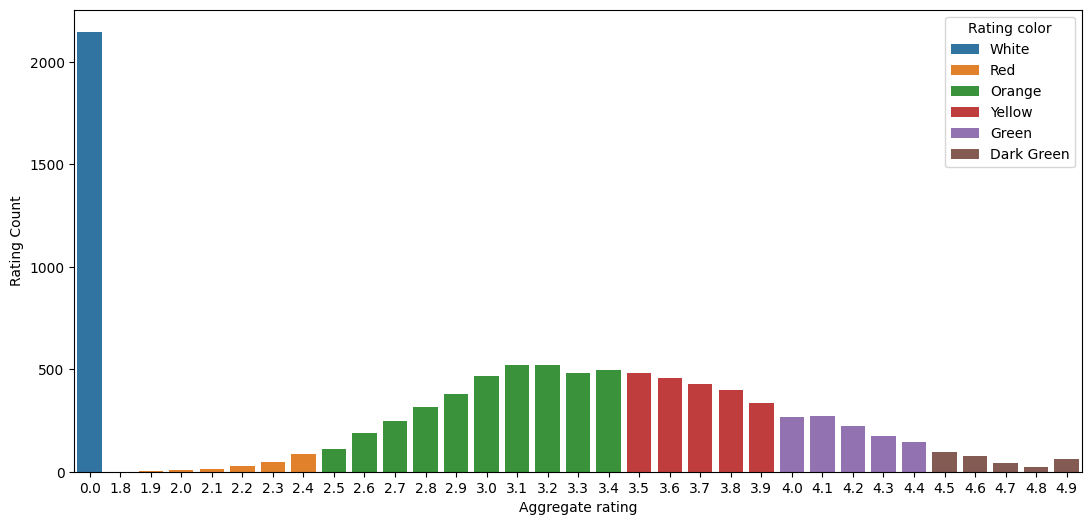

In [13]:
plt.rcParams['figure.figsize']=(13,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=rating,hue='Rating color')

In [14]:
df1['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [15]:
online_delivery = df1.groupby(['Country','City','Has Online delivery']).size().reset_index(name='count')

In [17]:
online_delivery = online_delivery[['Country','City','Has Online delivery','count']].sort_values(by=['count'],ascending=False)[:5]

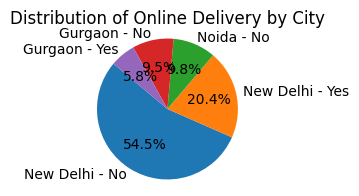

In [18]:
import plotly.express as px
x=online_delivery.apply(lambda x: f"{x['City']} - { x['Has Online delivery'] }", axis=1)

y = online_delivery['count']
plt.figure(figsize=(2, 2))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Online Delivery by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
grouped_data1 = df1[['Country', 'City', 'Cuisines','Votes']].sort_values(by=['Votes'],ascending=False)[:5]

<Axes: xlabel='Cuisines', ylabel='Votes'>

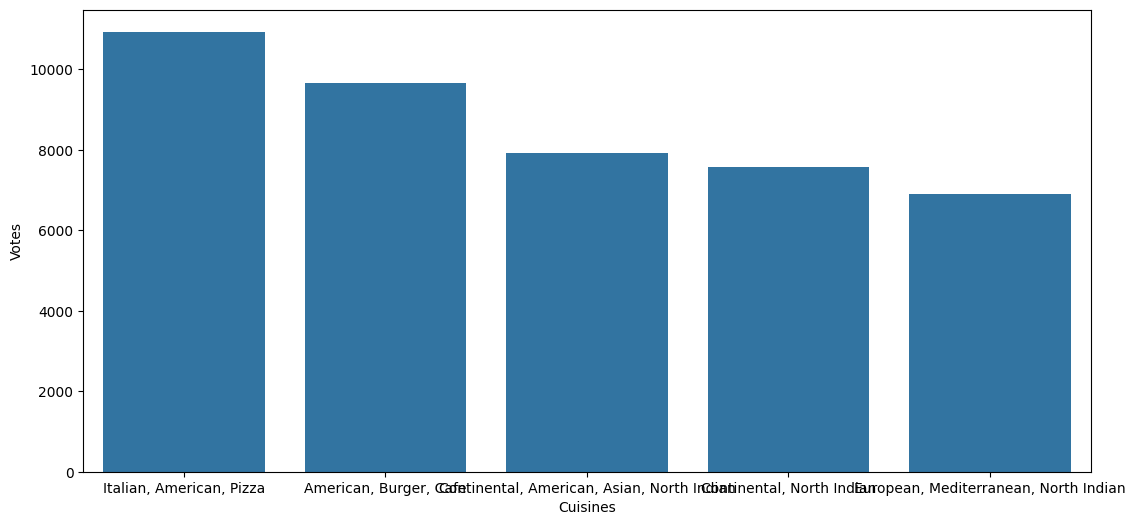

In [20]:
plt.rcParams['figure.figsize']=(13,6)
sns.barplot(x='Cuisines',y='Votes',data=grouped_data1)

In [22]:
grouped_data = df1.groupby(['Country', 'City'])['Rating text'].unique()

In [23]:
df4 = df1['Locality'].value_counts()

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(df1['Locality'])

plt.xticks(rotation=90)

plt.show()